In [49]:
import pandas as pd
pd.set_option('display.max_columns', 30)

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [21]:
# Read the x_train csv file

data = pd.read_csv("x_train.csv", index_col=None)
data.head()

,emergency vehicle selection,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,emergency vehicle type,rescue center,selection time,date key sélection,time key sélection,status preceding selection,delta status preceding selection-selection,departed from its rescue center,longitude before departure,latitude before departure,delta position gps previous departure-departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration
0,5105452,13264186,3,2162,0,0,148.0,2.284796,48.879669,4511,VSAV BSPP,2447,2018-07-08 19:02:43.990,20180708,190243,Rentré,2027,1,2.288053,48.884698,NaN,"2.289000,48.885113;2.288861,48.884998;2.288000...",2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""}yjiH}x}L_...",952.5,105.8
1,4720915,12663715,3,2124,0,1,136.0,2.247464,48.818191,4327,PSE,2464,2018-01-04 09:02:59.470,20180104,90259,Rentré,28233,1,2.268519,48.823958,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""u|~hHy`zL_...",2238.5,243.2
2,5365374,13675521,3,2163,0,2,139.0,2.258328,48.836759,4509,VSAV BSPP,2438,2018-11-16 10:11:47.777,20181116,101147,Disponible,1981,0,2.272944,48.850498,33.0,"2.272972,48.850498;2.269056,48.847443;2.262611...",2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""_cdiHo}zLm...",3026.4,295.4
3,4741586,12695745,3,2162,0,0,136.0,2.393832,48.776526,5731,VSAV BSPP,2510,2018-01-15 00:38:46.820,20180115,3846,Rentré,1842,1,2.388940,48.787732,NaN,"2.394278,48.782112;2.393639,48.776833",2018-01-15 00:42:46;2018-01-15 00:43:58,"{""code"":""Ok"",""routes"":[{""geometry"":""sywhH_pqMy...",1934.2,166.6
4,5381209,13698743,3,2162,0,3,104.0,2.458610,48.875751,5623,VSAV BSPP,2478,2018-11-24 00:34:26.017,20181124,3426,Rentré,2716,1,2.439331,48.863814,NaN,"2.439472,48.863724;2.439583,48.863777;2.440917...",2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""wvfiHgn{Mj...",2706.7,262.6


In [48]:
data1 = pd.read_csv("x_test.csv", index_col=None)
data1.head()

,emergency vehicle selection,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,emergency vehicle type,rescue center,selection time,date key sélection,time key sélection,status preceding selection,delta status preceding selection-selection,departed from its rescue center,longitude before departure,latitude before departure,delta position gps previous departure-departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration
0,5271704,13535032,3,2113,0,2,136.0,2.464084,48.818439,5755,VSAV BSPP,2483,2018-10-02 12:41:22.637,20181002,124122,Rentré,953,1,2.481148,48.841034,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""igbiHmrcNh...",3266.8,336.5
1,5092931,13244794,3,2113,0,0,228.0,2.325948,48.925197,3100,VSAV BSPP,2462,2018-07-03 13:14:47.797,20180703,131447,Rentré,1906,1,2.301399,48.929297,NaN,"2.309139,48.929722;2.319861,48.924110;2.326944...",2018-07-03 13:20:00;2018-07-03 13:21:12;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""uosiH}j`Mi...",2710.3,218.4
2,5153756,13345422,3,2112,1,0,148.0,2.519115,48.859304,3538,VSAV BSPP,2482,2018-07-30 13:42:11.173,20180730,134211,Rentré,654,1,2.523220,48.853350,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""wsdiHkvkNa...",914.2,85.1
3,5355572,13663044,3,2120,0,0,201.0,2.366121,48.868379,6042,VSAV BSPP,2450,2018-11-12 03:37:02.657,20181112,33702,Rentré,10816,1,2.358564,48.871215,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""kchiHcskMt...",1124.2,167.8
4,5178915,13386354,3,2113,1,0,148.0,2.345241,48.860093,4466,VSAV BSPP,2493,2018-08-12 19:34:43.560,20180812,193443,Rentré,3219,1,2.344680,48.864165,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""kvfiHg_iMq...",1542.7,244.0


In [22]:
# Read the y_train csv file
label = pd.read_csv("y_train.csv")
label.head()

,emergency vehicle selection,delta selection-departure,delta departure-presentation,delta selection-presentation
0,5105452,86,324,410
1,4720915,164,297,461
2,5365374,125,365,490
3,4741586,168,160,328
4,5381209,138,523,661


In [23]:
# Merge the x_train and y_train file
data = pd.merge(data, label, on='emergency vehicle selection')

In [24]:
data.head()

,emergency vehicle selection,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,emergency vehicle type,rescue center,selection time,date key sélection,time key sélection,status preceding selection,delta status preceding selection-selection,departed from its rescue center,longitude before departure,latitude before departure,delta position gps previous departure-departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation
0,5105452,13264186,3,2162,0,0,148.0,2.284796,48.879669,4511,VSAV BSPP,2447,2018-07-08 19:02:43.990,20180708,190243,Rentré,2027,1,2.288053,48.884698,NaN,"2.289000,48.885113;2.288861,48.884998;2.288000...",2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""}yjiH}x}L_...",952.5,105.8,86,324,410
1,4720915,12663715,3,2124,0,1,136.0,2.247464,48.818191,4327,PSE,2464,2018-01-04 09:02:59.470,20180104,90259,Rentré,28233,1,2.268519,48.823958,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""u|~hHy`zL_...",2238.5,243.2,164,297,461
2,5365374,13675521,3,2163,0,2,139.0,2.258328,48.836759,4509,VSAV BSPP,2438,2018-11-16 10:11:47.777,20181116,101147,Disponible,1981,0,2.272944,48.850498,33.0,"2.272972,48.850498;2.269056,48.847443;2.262611...",2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""_cdiHo}zLm...",3026.4,295.4,125,365,490
3,4741586,12695745,3,2162,0,0,136.0,2.393832,48.776526,5731,VSAV BSPP,2510,2018-01-15 00:38:46.820,20180115,3846,Rentré,1842,1,2.388940,48.787732,NaN,"2.394278,48.782112;2.393639,48.776833",2018-01-15 00:42:46;2018-01-15 00:43:58,"{""code"":""Ok"",""routes"":[{""geometry"":""sywhH_pqMy...",1934.2,166.6,168,160,328
4,5381209,13698743,3,2162,0,3,104.0,2.458610,48.875751,5623,VSAV BSPP,2478,2018-11-24 00:34:26.017,20181124,3426,Rentré,2716,1,2.439331,48.863814,NaN,"2.439472,48.863724;2.439583,48.863777;2.440917...",2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""wvfiHgn{Mj...",2706.7,262.6,138,523,661


In [25]:
#Drop the features which is repeated and of no use
data = data.drop(['emergency vehicle selection', 'intervention', 'selection time'], axis=1)

In [26]:
# count alert reason category 
data['alert reason category'].value_counts()

3    176787
1     21270
9      7481
2      5705
6      4814
4      1221
7       901
5       781
8       377
Name: alert reason category, dtype: int64

In [27]:
data['alert reason'].value_counts()

2162     68515
2112     37332
2113     23112
2163     15272
1922     13339
2135      7559
2124      5927
2711      5919
2134      3413
2120      3392
5062      2964
2421      2568
2119      2214
2011      2057
1941      2056
2018      1984
2118      1765
2136      1675
2017      1562
1918      1389
1929      1306
2716      1252
1914      1036
2132       837
1912       792
2426       707
2141       644
2524       590
2212       563
2116       524
         ...  
11021        6
2133         6
2026         5
2613         5
2210         4
1952         4
2414         4
2014         4
1917         4
2022         4
1920         3
2215         3
2715         3
1944         2
2734         2
2145         2
2127         2
10821        2
2430         2
2727         2
2218         1
2726         1
2612         1
1931         1
2317         1
2128         1
2519         1
10971        1
2413         1
5811         1
Name: alert reason, Length: 126, dtype: int64

In [28]:
#count the intervention on public roads 
data['intervention on public roads'].value_counts()

0    187201
1     32136
Name: intervention on public roads, dtype: int64

In [29]:
#count the intervention on each floor
data['floor'].value_counts()

 0      140033
 1       17707
 2       14725
 3       12299
 4        9770
 5        6892
 6        4709
-1        3702
 7        2756
 8        1691
 9        1121
 10        789
-2         612
 11        564
 12        418
 13        316
 14        250
 15        182
-3         141
 17        134
 16        131
-4         113
 18         73
 19         25
 22         23
 21         23
 27         17
 26         15
 20         14
 24         12
 29         12
 23         11
 30         10
 100         9
 25          8
 32          7
-6           5
-5           5
 37          4
 28          3
 33          2
 52          1
 31          1
-10          1
 79          1
Name: floor, dtype: int64

In [30]:
#count the intervention on each locations
data['location of the event'].value_counts()

139.0    51031
136.0    44400
148.0    31997
149.0     9905
140.0     5237
107.0     4869
137.0     4679
131.0     3130
104.0     2687
325.0     2413
100.0     2357
259.0     2349
228.0     2142
241.0     1932
219.0     1866
135.0     1796
196.0     1776
105.0     1354
202.0     1297
210.0     1040
147.0     1024
224.0      945
218.0      842
199.0      785
211.0      763
257.0      749
201.0      747
226.0      727
164.0      709
232.0      706
         ...  
250.0        3
154.0        3
282.0        3
285.0        3
292.0        2
153.0        2
159.0        2
183.0        2
245.0        2
124.0        2
279.0        2
299.0        2
311.0        2
297.0        2
313.0        2
315.0        2
109.0        2
284.0        1
213.0        1
293.0        1
151.0        1
265.0        1
247.0        1
248.0        1
215.0        1
290.0        1
160.0        1
324.0        1
200.0        1
302.0        1
Name: location of the event, Length: 210, dtype: int64

In [31]:
#count the emergency vehicle of each type
data['emergency vehicle'].value_counts()

5820    1925
5998    1831
5661    1721
5623    1641
6002    1590
5702    1535
5719    1492
5760    1474
5775    1416
5726    1403
5821    1402
5729    1395
6000    1383
5781    1352
5882    1349
4541    1344
6004    1323
4539    1320
5621    1308
5887    1307
4511    1306
4908    1302
6005    1302
4540    1290
5883    1286
5761    1279
4879    1278
5622    1271
4510    1269
5715    1267
        ... 
3293       1
5874       1
4492       1
2515       1
2958       1
3086       1
1935       1
4114       1
4882       1
5264       1
2578       1
3221       1
5268       1
3223       1
2582       1
5269       1
5786       1
4379       1
3442       1
2712       1
6043       1
5784       1
3038       1
4894       1
3229       1
3056       1
3228       1
4892       1
5276       1
2859       1
Name: emergency vehicle, Length: 749, dtype: int64

In [32]:
#count the emergency vehicle type
data['emergency vehicle type'].value_counts()

VSAV BSPP       159620
PSE              32927
VLR BSPP          5820
FPT BSPP          4107
AR                2583
FA                2526
EPA BSPP          2054
EPAN              1966
CCR BSPP          1428
CRF               1425
FNPC               863
VID                808
BEAA BSPP          567
EPSA               477
CRAC               380
FPTL BSPP          317
VPS                203
FFSS               126
VRA                 94
VRCH BSPP           92
OHFOM               83
CD BSPP             81
VPC GIS             68
PEV                 61
VE2I                56
VLHP                53
SFCB                50
VRSD                45
UMH 75              43
UMPS                29
                 ...  
UMH LARIB            8
CFS                  8
ESAVI                7
VRM                  6
UMH 92               6
VEC                  6
VPC GFIS             6
VRCP                 5
UMH 94               5
VSAV SDIS            5
UMH DIEU             4
CMO APP              4
VSTI       

In [33]:
data['rescue center'].value_counts()

2475      6146
2477      5930
2447      5431
2488      5242
2446      5209
2463      4878
2469      4774
2474      4764
2497      4676
2486      4668
2478      4377
2442      4375
2441      4323
2460      4208
2491      4167
2439      3937
2449      3870
2443      3847
2436      3558
2510      3426
2479      3404
2450      3387
2444      3341
2454      3301
2493      3293
2480      3246
2501      3233
2437      3214
2438      3162
2448      3152
          ... 
2476      1472
2495      1440
2440      1371
2498      1359
266290    1179
2503      1134
2471      1106
2505       647
266321     240
266322     135
266267      85
266295      73
266270      67
266268      53
266269      53
266320      29
266296      23
266281      19
266294      18
2418        15
266279      13
266298      10
2453         8
266276       8
266323       6
266326       6
266278       2
266324       2
266277       1
259509       1
Name: rescue center, Length: 94, dtype: int64

In [34]:
#calculate the missing value percentage in each features
missing = data.isnull().sum()

for i in range(len(missing)):
    missing[i] = (missing[i]/data.shape[0])*100

In [35]:
missing

alert reason category                               0
alert reason                                        0
intervention on public roads                        0
floor                                               0
location of the event                               5
longitude intervention                              0
latitude intervention                               0
emergency vehicle                                   0
emergency vehicle type                              0
rescue center                                       0
date key sélection                                  0
time key sélection                                  0
status preceding selection                          0
delta status preceding selection-selection          0
departed from its rescue center                     0
longitude before departure                          0
latitude before departure                           0
delta position gps previous departure-departure    97
GPS tracks departure-present

In [36]:
#drop the feature which have maximum null values
data = data.drop(['delta position gps previous departure-departure'], axis=1)

In [37]:
data.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,emergency vehicle type,rescue center,date key sélection,time key sélection,status preceding selection,delta status preceding selection-selection,departed from its rescue center,longitude before departure,latitude before departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation
0,3,2162,0,0,148.0,2.284796,48.879669,4511,VSAV BSPP,2447,20180708,190243,Rentré,2027,1,2.288053,48.884698,"2.289000,48.885113;2.288861,48.884998;2.288000...",2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""}yjiH}x}L_...",952.5,105.8,86,324,410
1,3,2124,0,1,136.0,2.247464,48.818191,4327,PSE,2464,20180104,90259,Rentré,28233,1,2.268519,48.823958,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""u|~hHy`zL_...",2238.5,243.2,164,297,461
2,3,2163,0,2,139.0,2.258328,48.836759,4509,VSAV BSPP,2438,20181116,101147,Disponible,1981,0,2.272944,48.850498,"2.272972,48.850498;2.269056,48.847443;2.262611...",2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""_cdiHo}zLm...",3026.4,295.4,125,365,490
3,3,2162,0,0,136.0,2.393832,48.776526,5731,VSAV BSPP,2510,20180115,3846,Rentré,1842,1,2.388940,48.787732,"2.394278,48.782112;2.393639,48.776833",2018-01-15 00:42:46;2018-01-15 00:43:58,"{""code"":""Ok"",""routes"":[{""geometry"":""sywhH_pqMy...",1934.2,166.6,168,160,328
4,3,2162,0,3,104.0,2.458610,48.875751,5623,VSAV BSPP,2478,20181124,3426,Rentré,2716,1,2.439331,48.863814,"2.439472,48.863724;2.439583,48.863777;2.440917...",2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""wvfiHgn{Mj...",2706.7,262.6,138,523,661


In [39]:
data = data.drop(['emergency vehicle'], axis = 1)

In [40]:
data.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,date key sélection,time key sélection,status preceding selection,delta status preceding selection-selection,departed from its rescue center,longitude before departure,latitude before departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation
0,3,2162,0,0,148.0,2.284796,48.879669,VSAV BSPP,2447,20180708,190243,Rentré,2027,1,2.288053,48.884698,"2.289000,48.885113;2.288861,48.884998;2.288000...",2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""}yjiH}x}L_...",952.5,105.8,86,324,410
1,3,2124,0,1,136.0,2.247464,48.818191,PSE,2464,20180104,90259,Rentré,28233,1,2.268519,48.823958,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""u|~hHy`zL_...",2238.5,243.2,164,297,461
2,3,2163,0,2,139.0,2.258328,48.836759,VSAV BSPP,2438,20181116,101147,Disponible,1981,0,2.272944,48.850498,"2.272972,48.850498;2.269056,48.847443;2.262611...",2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""_cdiHo}zLm...",3026.4,295.4,125,365,490
3,3,2162,0,0,136.0,2.393832,48.776526,VSAV BSPP,2510,20180115,3846,Rentré,1842,1,2.388940,48.787732,"2.394278,48.782112;2.393639,48.776833",2018-01-15 00:42:46;2018-01-15 00:43:58,"{""code"":""Ok"",""routes"":[{""geometry"":""sywhH_pqMy...",1934.2,166.6,168,160,328
4,3,2162,0,3,104.0,2.458610,48.875751,VSAV BSPP,2478,20181124,3426,Rentré,2716,1,2.439331,48.863814,"2.439472,48.863724;2.439583,48.863777;2.440917...",2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""wvfiHgn{Mj...",2706.7,262.6,138,523,661


In [41]:
#counts the status  of the vehicle
data['status preceding selection'].value_counts()

Rentré        214434
Disponible      4903
Name: status preceding selection, dtype: int64

In [42]:
data['delta status preceding selection-selection'].value_counts()
data = data.drop(['delta status preceding selection-selection'], axis = 1)

In [43]:
data.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,date key sélection,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation
0,3,2162,0,0,148.0,2.284796,48.879669,VSAV BSPP,2447,20180708,190243,Rentré,1,2.288053,48.884698,"2.289000,48.885113;2.288861,48.884998;2.288000...",2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""}yjiH}x}L_...",952.5,105.8,86,324,410
1,3,2124,0,1,136.0,2.247464,48.818191,PSE,2464,20180104,90259,Rentré,1,2.268519,48.823958,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""u|~hHy`zL_...",2238.5,243.2,164,297,461
2,3,2163,0,2,139.0,2.258328,48.836759,VSAV BSPP,2438,20181116,101147,Disponible,0,2.272944,48.850498,"2.272972,48.850498;2.269056,48.847443;2.262611...",2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""_cdiHo}zLm...",3026.4,295.4,125,365,490
3,3,2162,0,0,136.0,2.393832,48.776526,VSAV BSPP,2510,20180115,3846,Rentré,1,2.388940,48.787732,"2.394278,48.782112;2.393639,48.776833",2018-01-15 00:42:46;2018-01-15 00:43:58,"{""code"":""Ok"",""routes"":[{""geometry"":""sywhH_pqMy...",1934.2,166.6,168,160,328
4,3,2162,0,3,104.0,2.458610,48.875751,VSAV BSPP,2478,20181124,3426,Rentré,1,2.439331,48.863814,"2.439472,48.863724;2.439583,48.863777;2.440917...",2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""wvfiHgn{Mj...",2706.7,262.6,138,523,661


In [44]:
group = data.groupby('alert reason category')
dataa = group.apply(lambda x: x['alert reason'].unique())
print(dataa)

alert reason category
1    [1929, 1922, 1941, 1924, 1918, 1923, 1912, 191...
2    [2011, 2018, 2017, 2015, 2012, 2020, 2026, 202...
3    [2162, 2124, 2163, 2112, 2113, 2135, 2120, 211...
4    [2212, 2214, 2216, 2221, 2211, 2213, 5811, 221...
5                       [2313, 2314, 2312, 2311, 2317]
6    [2426, 2421, 7913, 2412, 7912, 2422, 2431, 791...
7           [2524, 2532, 2523, 2511, 2514, 2525, 2519]
8                       [2623, 2614, 2624, 2613, 2612]
9    [2711, 2716, 2752, 2724, 2720, 2712, 2715, 935...
dtype: object


In [45]:
data.dtypes

alert reason category                           int64
alert reason                                    int64
intervention on public roads                    int64
floor                                           int64
location of the event                         float64
longitude intervention                        float64
latitude intervention                         float64
emergency vehicle type                         object
rescue center                                   int64
date key sélection                              int64
time key sélection                              int64
status preceding selection                     object
departed from its rescue center                 int64
longitude before departure                    float64
latitude before departure                     float64
GPS tracks departure-presentation              object
GPS tracks datetime departure-presentation     object
OSRM response                                  object
OSRM estimated distance     

In [46]:
data.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,date key sélection,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation
0,3,2162,0,0,148.0,2.284796,48.879669,VSAV BSPP,2447,20180708,190243,Rentré,1,2.288053,48.884698,"2.289000,48.885113;2.288861,48.884998;2.288000...",2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""}yjiH}x}L_...",952.5,105.8,86,324,410
1,3,2124,0,1,136.0,2.247464,48.818191,PSE,2464,20180104,90259,Rentré,1,2.268519,48.823958,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""u|~hHy`zL_...",2238.5,243.2,164,297,461
2,3,2163,0,2,139.0,2.258328,48.836759,VSAV BSPP,2438,20181116,101147,Disponible,0,2.272944,48.850498,"2.272972,48.850498;2.269056,48.847443;2.262611...",2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""_cdiHo}zLm...",3026.4,295.4,125,365,490
3,3,2162,0,0,136.0,2.393832,48.776526,VSAV BSPP,2510,20180115,3846,Rentré,1,2.388940,48.787732,"2.394278,48.782112;2.393639,48.776833",2018-01-15 00:42:46;2018-01-15 00:43:58,"{""code"":""Ok"",""routes"":[{""geometry"":""sywhH_pqMy...",1934.2,166.6,168,160,328
4,3,2162,0,3,104.0,2.458610,48.875751,VSAV BSPP,2478,20181124,3426,Rentré,1,2.439331,48.863814,"2.439472,48.863724;2.439583,48.863777;2.440917...",2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""wvfiHgn{Mj...",2706.7,262.6,138,523,661


In [47]:
import matplotlib.pyplot as plt
plt.scatter(data['latitude intervention'], data['longitude intervention'], marker=1)
plt.show()

<Figure size 640x480 with 1 Axes>

In [ ]:
# plotting  the graph between longitude intervention and lattitude inrtervention

In [56]:
N=50000

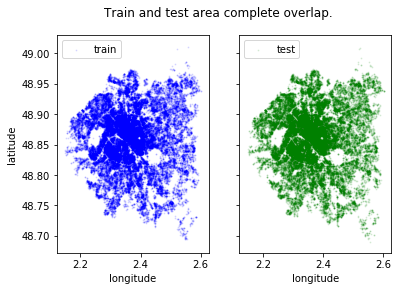

In [57]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(data['longitude intervention'].values[:N], data['latitude intervention'].values[:N],
              color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(data1['longitude intervention'].values[:N], data1['latitude intervention'].values[:N],
              color='green', s=1, label='test', alpha=0.1)
fig.suptitle('Train and test area complete overlap.')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)

plt.show()


In [58]:
#convert date key selection in the appropriate time format
import datetime

sample = str(data['date key sélection'][6])
print(sample)

sample = datetime.datetime(int(sample[0:4]), int(sample[4:6]), int(sample[6:8]))
print(sample)

20180824
2018-08-24 00:00:00


In [59]:
dates = data['date key sélection']

count = 0
def datess(dates):
    count = 0
    for date in dates:
        date = str(date)
        date = date[0:4]
        if date == "2018":
            count += 1
    print(count/len(dates))
    
datess(dates)

1.0


In [60]:
#extract month and date from date key selection
def get_month(date):
    date = str(date)
    month = date[4:6]
    return int(month)

def get_date(date):
    date = str(date)
    date = date[6:8]
    return int(date)

data['month'] = data['date key sélection'].apply(lambda x: get_month(x))
data['date'] = data['date key sélection'].apply(lambda x: get_date(x))

data.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,date key sélection,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation,month,date
0,3,2162,0,0,148.0,2.284796,48.879669,VSAV BSPP,2447,20180708,190243,Rentré,1,2.288053,48.884698,"2.289000,48.885113;2.288861,48.884998;2.288000...",2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""}yjiH}x}L_...",952.5,105.8,86,324,410,7,8
1,3,2124,0,1,136.0,2.247464,48.818191,PSE,2464,20180104,90259,Rentré,1,2.268519,48.823958,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""u|~hHy`zL_...",2238.5,243.2,164,297,461,1,4
2,3,2163,0,2,139.0,2.258328,48.836759,VSAV BSPP,2438,20181116,101147,Disponible,0,2.272944,48.850498,"2.272972,48.850498;2.269056,48.847443;2.262611...",2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""_cdiHo}zLm...",3026.4,295.4,125,365,490,11,16
3,3,2162,0,0,136.0,2.393832,48.776526,VSAV BSPP,2510,20180115,3846,Rentré,1,2.388940,48.787732,"2.394278,48.782112;2.393639,48.776833",2018-01-15 00:42:46;2018-01-15 00:43:58,"{""code"":""Ok"",""routes"":[{""geometry"":""sywhH_pqMy...",1934.2,166.6,168,160,328,1,15
4,3,2162,0,3,104.0,2.458610,48.875751,VSAV BSPP,2478,20181124,3426,Rentré,1,2.439331,48.863814,"2.439472,48.863724;2.439583,48.863777;2.440917...",2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""wvfiHgn{Mj...",2706.7,262.6,138,523,661,11,24


In [61]:
#printing the data types of features
data.dtypes

alert reason category                           int64
alert reason                                    int64
intervention on public roads                    int64
floor                                           int64
location of the event                         float64
longitude intervention                        float64
latitude intervention                         float64
emergency vehicle type                         object
rescue center                                   int64
date key sélection                              int64
time key sélection                              int64
status preceding selection                     object
departed from its rescue center                 int64
longitude before departure                    float64
latitude before departure                     float64
GPS tracks departure-presentation              object
GPS tracks datetime departure-presentation     object
OSRM response                                  object
OSRM estimated distance     

In [62]:
#drop the date key selection
data = data.drop(['date key sélection'], axis = 1)
data.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation,month,date
0,3,2162,0,0,148.0,2.284796,48.879669,VSAV BSPP,2447,190243,Rentré,1,2.288053,48.884698,"2.289000,48.885113;2.288861,48.884998;2.288000...",2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""}yjiH}x}L_...",952.5,105.8,86,324,410,7,8
1,3,2124,0,1,136.0,2.247464,48.818191,PSE,2464,90259,Rentré,1,2.268519,48.823958,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""u|~hHy`zL_...",2238.5,243.2,164,297,461,1,4
2,3,2163,0,2,139.0,2.258328,48.836759,VSAV BSPP,2438,101147,Disponible,0,2.272944,48.850498,"2.272972,48.850498;2.269056,48.847443;2.262611...",2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""_cdiHo}zLm...",3026.4,295.4,125,365,490,11,16
3,3,2162,0,0,136.0,2.393832,48.776526,VSAV BSPP,2510,3846,Rentré,1,2.388940,48.787732,"2.394278,48.782112;2.393639,48.776833",2018-01-15 00:42:46;2018-01-15 00:43:58,"{""code"":""Ok"",""routes"":[{""geometry"":""sywhH_pqMy...",1934.2,166.6,168,160,328,1,15
4,3,2162,0,3,104.0,2.458610,48.875751,VSAV BSPP,2478,3426,Rentré,1,2.439331,48.863814,"2.439472,48.863724;2.439583,48.863777;2.440917...",2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""wvfiHgn{Mj...",2706.7,262.6,138,523,661,11,24


In [63]:
#count the intervention in each month
m_list = data['month'].value_counts()
m_list

7     21339
12    21030
1     20767
10    20524
6     20443
11    20395
3     20206
5     20166
4     18794
2     18326
8     17347
Name: month, dtype: int64

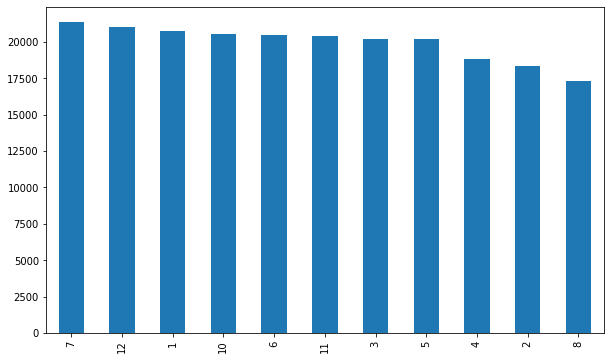

In [64]:
#plot the graph between month and intervention
plt.figure(figsize=(10,6))
pd.value_counts(data['month']).plot.bar()

In [65]:
data.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation,month,date
0,3,2162,0,0,148.0,2.284796,48.879669,VSAV BSPP,2447,190243,Rentré,1,2.288053,48.884698,"2.289000,48.885113;2.288861,48.884998;2.288000...",2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""}yjiH}x}L_...",952.5,105.8,86,324,410,7,8
1,3,2124,0,1,136.0,2.247464,48.818191,PSE,2464,90259,Rentré,1,2.268519,48.823958,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""u|~hHy`zL_...",2238.5,243.2,164,297,461,1,4
2,3,2163,0,2,139.0,2.258328,48.836759,VSAV BSPP,2438,101147,Disponible,0,2.272944,48.850498,"2.272972,48.850498;2.269056,48.847443;2.262611...",2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""_cdiHo}zLm...",3026.4,295.4,125,365,490,11,16
3,3,2162,0,0,136.0,2.393832,48.776526,VSAV BSPP,2510,3846,Rentré,1,2.388940,48.787732,"2.394278,48.782112;2.393639,48.776833",2018-01-15 00:42:46;2018-01-15 00:43:58,"{""code"":""Ok"",""routes"":[{""geometry"":""sywhH_pqMy...",1934.2,166.6,168,160,328,1,15
4,3,2162,0,3,104.0,2.458610,48.875751,VSAV BSPP,2478,3426,Rentré,1,2.439331,48.863814,"2.439472,48.863724;2.439583,48.863777;2.440917...",2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""wvfiHgn{Mj...",2706.7,262.6,138,523,661,11,24


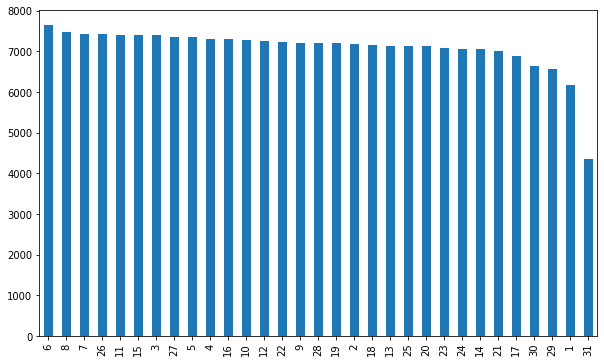

In [66]:
#plot the intervention in each day
plt.figure(figsize=(10,6))
pd.value_counts(data['date']).plot.bar()

In [67]:
data = data.drop('date', axis=1)
data.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation,month
0,3,2162,0,0,148.0,2.284796,48.879669,VSAV BSPP,2447,190243,Rentré,1,2.288053,48.884698,"2.289000,48.885113;2.288861,48.884998;2.288000...",2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""}yjiH}x}L_...",952.5,105.8,86,324,410,7
1,3,2124,0,1,136.0,2.247464,48.818191,PSE,2464,90259,Rentré,1,2.268519,48.823958,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""u|~hHy`zL_...",2238.5,243.2,164,297,461,1
2,3,2163,0,2,139.0,2.258328,48.836759,VSAV BSPP,2438,101147,Disponible,0,2.272944,48.850498,"2.272972,48.850498;2.269056,48.847443;2.262611...",2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""_cdiHo}zLm...",3026.4,295.4,125,365,490,11
3,3,2162,0,0,136.0,2.393832,48.776526,VSAV BSPP,2510,3846,Rentré,1,2.388940,48.787732,"2.394278,48.782112;2.393639,48.776833",2018-01-15 00:42:46;2018-01-15 00:43:58,"{""code"":""Ok"",""routes"":[{""geometry"":""sywhH_pqMy...",1934.2,166.6,168,160,328,1
4,3,2162,0,3,104.0,2.458610,48.875751,VSAV BSPP,2478,3426,Rentré,1,2.439331,48.863814,"2.439472,48.863724;2.439583,48.863777;2.440917...",2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""wvfiHgn{Mj...",2706.7,262.6,138,523,661,11


In [68]:
# fetch the hour value from the time key selection
def get_hour(time):
    time = str(time)
    if len(time) <= 4:
        return 0
    else:
        return int(time[:-4])
    
data['time key sélection'] = data['time key sélection'].apply(lambda x: get_hour(x))
data.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation,month
0,3,2162,0,0,148.0,2.284796,48.879669,VSAV BSPP,2447,19,Rentré,1,2.288053,48.884698,"2.289000,48.885113;2.288861,48.884998;2.288000...",2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""}yjiH}x}L_...",952.5,105.8,86,324,410,7
1,3,2124,0,1,136.0,2.247464,48.818191,PSE,2464,9,Rentré,1,2.268519,48.823958,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""u|~hHy`zL_...",2238.5,243.2,164,297,461,1
2,3,2163,0,2,139.0,2.258328,48.836759,VSAV BSPP,2438,10,Disponible,0,2.272944,48.850498,"2.272972,48.850498;2.269056,48.847443;2.262611...",2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""_cdiHo}zLm...",3026.4,295.4,125,365,490,11
3,3,2162,0,0,136.0,2.393832,48.776526,VSAV BSPP,2510,0,Rentré,1,2.388940,48.787732,"2.394278,48.782112;2.393639,48.776833",2018-01-15 00:42:46;2018-01-15 00:43:58,"{""code"":""Ok"",""routes"":[{""geometry"":""sywhH_pqMy...",1934.2,166.6,168,160,328,1
4,3,2162,0,3,104.0,2.458610,48.875751,VSAV BSPP,2478,0,Rentré,1,2.439331,48.863814,"2.439472,48.863724;2.439583,48.863777;2.440917...",2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""wvfiHgn{Mj...",2706.7,262.6,138,523,661,11


In [69]:
times = data['time key sélection'].value_counts().sort_index()

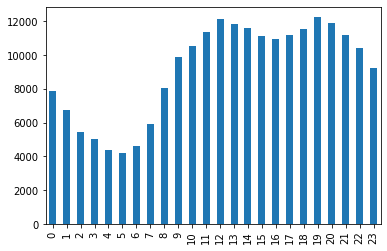

In [71]:
#plot the intervention in each hour of the days
times.plot(kind='bar')

In [72]:
data.to_csv('edit.csv', index=None)

In [74]:
data['emergency vehicle type'].value_counts()

VSAV BSPP       159620
PSE              32927
VLR BSPP          5820
FPT BSPP          4107
AR                2583
FA                2526
EPA BSPP          2054
EPAN              1966
CCR BSPP          1428
CRF               1425
FNPC               863
VID                808
BEAA BSPP          567
EPSA               477
CRAC               380
FPTL BSPP          317
VPS                203
FFSS               126
VRA                 94
VRCH BSPP           92
OHFOM               83
CD BSPP             81
VPC GIS             68
PEV                 61
VE2I                56
VLHP                53
SFCB                50
VRSD                45
UMH 75              43
UMPS                29
                 ...  
UMH LARIB            8
CFS                  8
ESAVI                7
VRM                  6
UMH 92               6
VEC                  6
VPC GFIS             6
VRCP                 5
UMH 94               5
VSAV SDIS            5
UMH DIEU             4
CMO APP              4
VSTI       

In [75]:
#convert the categorical values into numerical values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(data['emergency vehicle type'])

list(le.classes_)

data['emergency vehicle type'] = le.transform(data['emergency vehicle type'])


In [76]:
def encode(s):
    if s == "Rentré":
        return 0
    else: 
        return 1
    
data['status preceding selection'] = data['status preceding selection'].apply(lambda s: encode(s))

In [78]:
data['departed from its rescue center'].value_counts()

1    214434
0      4903
Name: departed from its rescue center, dtype: int64

In [80]:

# correlation between each attributes
data.corr()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation,month
alert reason category,1.000000,0.168381,-0.063025,0.082536,-0.077027,-0.014931,-0.020865,-0.084326,0.005843,0.025661,-0.006645,0.006645,-0.014677,-0.018565,-0.025948,-0.022129,0.036247,0.045245,0.054071,-0.012977
alert reason,0.168381,1.000000,-0.017644,0.009352,-0.015308,-0.005842,-0.003883,-0.013888,0.012499,-0.000084,-0.001150,0.001150,-0.005489,-0.001372,0.022774,0.023524,0.023419,0.027587,0.033390,-0.008177
intervention on public roads,-0.063025,-0.017644,1.000000,-0.197776,-0.034273,-0.019302,0.027573,0.072870,-0.023260,0.003880,-0.000642,0.000642,-0.018729,0.026387,-0.073699,-0.074695,-0.016129,-0.057065,-0.058743,0.015899
floor,0.082536,0.009352,-0.197776,1.000000,-0.207471,-0.054535,-0.000027,-0.019510,-0.026403,-0.017961,-0.008576,0.008576,-0.052899,-0.000072,-0.071589,-0.063506,0.012922,0.002170,0.006167,-0.009438
location of the event,-0.077027,-0.015308,-0.034273,-0.207471,1.000000,-0.040494,0.002305,0.102133,-0.010403,0.025275,0.014180,-0.014180,-0.037829,0.002116,-0.021990,-0.024418,-0.076043,-0.046528,-0.066739,0.001458
longitude intervention,-0.014931,-0.005842,-0.019302,-0.054535,-0.040494,1.000000,-0.004002,-0.003051,0.116857,-0.001960,0.003979,-0.003979,0.977009,-0.002441,0.142606,0.094213,0.024828,0.040480,0.045948,0.003173
latitude intervention,-0.020865,-0.003883,0.027573,-0.000027,0.002305,-0.004002,1.000000,0.012851,0.113703,-0.005186,0.011474,-0.011474,-0.005555,0.972077,-0.062935,-0.127754,0.022865,-0.000825,0.006531,0.000377
emergency vehicle type,-0.084326,-0.013888,0.072870,-0.019510,0.102133,-0.003051,0.012851,1.000000,-0.015779,-0.053485,0.037394,-0.037394,-0.000723,0.016166,-0.064611,-0.064229,-0.129603,-0.034333,-0.073656,0.004091
rescue center,0.005843,0.012499,-0.023260,-0.026403,-0.010403,0.116857,0.113703,-0.015779,1.000000,-0.008133,-0.000052,0.000052,0.118365,0.141301,0.194729,0.150626,0.016305,0.039209,0.042031,0.002217
time key sélection,0.025661,-0.000084,0.003880,-0.017961,0.025275,-0.001960,-0.005186,-0.053485,-0.008133,1.000000,0.016885,-0.016885,-0.002238,-0.004877,0.017560,0.015784,-0.180119,-0.019472,-0.075841,-0.001967


In [81]:
data['location of the event'].value_counts()

139.0    51031
136.0    44400
148.0    31997
149.0     9905
140.0     5237
107.0     4869
137.0     4679
131.0     3130
104.0     2687
325.0     2413
100.0     2357
259.0     2349
228.0     2142
241.0     1932
219.0     1866
135.0     1796
196.0     1776
105.0     1354
202.0     1297
210.0     1040
147.0     1024
224.0      945
218.0      842
199.0      785
211.0      763
257.0      749
201.0      747
226.0      727
164.0      709
232.0      706
         ...  
250.0        3
154.0        3
282.0        3
285.0        3
292.0        2
153.0        2
159.0        2
183.0        2
245.0        2
124.0        2
279.0        2
299.0        2
311.0        2
297.0        2
313.0        2
315.0        2
109.0        2
284.0        1
213.0        1
293.0        1
151.0        1
265.0        1
247.0        1
248.0        1
215.0        1
290.0        1
160.0        1
324.0        1
200.0        1
302.0        1
Name: location of the event, Length: 210, dtype: int64

In [82]:
data.to_csv('edit.csv', index=None)

In [83]:
data = pd.read_csv('edit.csv')


In [84]:
#fill the null values in location of the event
import numpy as np
fill = data[data['location of the event'].isnull()]
side_data = data[np.isfinite(data['location of the event'])]
side_data.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation,month
0,3,2162,0,0,148.0,2.284796,48.879669,69,2447,19,0,1,2.288053,48.884698,"2.289000,48.885113;2.288861,48.884998;2.288000...",2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""}yjiH}x}L_...",952.5,105.8,86,324,410,7
1,3,2124,0,1,136.0,2.247464,48.818191,27,2464,9,0,1,2.268519,48.823958,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""u|~hHy`zL_...",2238.5,243.2,164,297,461,1
2,3,2163,0,2,139.0,2.258328,48.836759,69,2438,10,1,0,2.272944,48.850498,"2.272972,48.850498;2.269056,48.847443;2.262611...",2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""_cdiHo}zLm...",3026.4,295.4,125,365,490,11
3,3,2162,0,0,136.0,2.393832,48.776526,69,2510,0,0,1,2.388940,48.787732,"2.394278,48.782112;2.393639,48.776833",2018-01-15 00:42:46;2018-01-15 00:43:58,"{""code"":""Ok"",""routes"":[{""geometry"":""sywhH_pqMy...",1934.2,166.6,168,160,328,1
4,3,2162,0,3,104.0,2.458610,48.875751,69,2478,0,0,1,2.439331,48.863814,"2.439472,48.863724;2.439583,48.863777;2.440917...",2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""wvfiHgn{Mj...",2706.7,262.6,138,523,661,11


In [85]:
side_data=side_data[['floor','location of the event','alert reason','alert reason category','intervention on public roads', 'emergency vehicle type', 'rescue center', 'month', 'departed from its rescue center']]

from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#define example
values = np.array(side_data['location of the event'])
print(values)
#integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
#binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
#invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

[148. 136. 139. ... 148. 139. 257.]


/home/shantanu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[148.]


In [87]:
data['location of the event'] = data['location of the event'].fillna(0)

In [88]:
data['location of the event'].isna().value_counts()

False    219337
Name: location of the event, dtype: int64

In [ ]:
#drop the features of high null values 

In [89]:
data = data.drop(['GPS tracks departure-presentation', 'GPS tracks datetime departure-presentation', 'OSRM response'], axis=1)

In [90]:
data.to_csv('edit.csv')

data.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation,month
0,3,2162,0,0,148.0,2.284796,48.879669,69,2447,19,0,1,2.288053,48.884698,952.5,105.8,86,324,410,7
1,3,2124,0,1,136.0,2.247464,48.818191,27,2464,9,0,1,2.268519,48.823958,2238.5,243.2,164,297,461,1
2,3,2163,0,2,139.0,2.258328,48.836759,69,2438,10,1,0,2.272944,48.850498,3026.4,295.4,125,365,490,11
3,3,2162,0,0,136.0,2.393832,48.776526,69,2510,0,0,1,2.388940,48.787732,1934.2,166.6,168,160,328,1
4,3,2162,0,3,104.0,2.458610,48.875751,69,2478,0,0,1,2.439331,48.863814,2706.7,262.6,138,523,661,11


In [4]:
# fuctions to preprocess the whole test data 

In [92]:
def get_month(date):
    date = str(date)
    month = date[4:6]
    return int(month)

def get_hour(time):
    time = str(time)
    if len(time) <= 4:
        return 0
    else:
        return int(time[:-4])

def encode(s):
    if s == "Rentré":
        return 0
    else: 
        return 1


def preprocess_data(data):
    from sklearn import preprocessing
    data = data.drop(['emergency vehicle selection', 'intervention', 'selection time'], axis=1)
    data = data.drop(['delta position gps previous departure-departure'], axis=1)
    data = data.drop(['emergency vehicle'], axis = 1)
    data = data.drop(['delta status preceding selection-selection'], axis = 1)
    
    data['month'] = data['date key sélection'].apply(lambda s: get_month(s))
    data['time key sélection'] = data['time key sélection'].apply(lambda s: get_hour(s))
    
    data = data.drop(['date key sélection'], axis = 1)

    le = preprocessing.LabelEncoder()
    le.fit(data['emergency vehicle type'])
    list(le.classes_)
    data['emergency vehicle type'] = le.transform(data['emergency vehicle type'])
    data = data.drop(['GPS tracks departure-presentation', 'GPS tracks datetime departure-presentation', 'OSRM response'], axis=1)
    data['status preceding selection'] = data['status preceding selection'].apply(lambda s: encode(s))

    return data

In [93]:
import pandas as pd
test = pd.read_csv('x_test.csv')

test = preprocess_data(test)
test.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,OSRM estimated distance,OSRM estimated duration,month
0,3,2113,0,2,136.0,2.464084,48.818439,61,2483,12,0,1,2.481148,48.841034,3266.8,336.5,10
1,3,2113,0,0,228.0,2.325948,48.925197,61,2462,13,0,1,2.301399,48.929297,2710.3,218.4,7
2,3,2112,1,0,148.0,2.519115,48.859304,61,2482,13,0,1,2.523220,48.853350,914.2,85.1,7
3,3,2120,0,0,201.0,2.366121,48.868379,61,2450,3,0,1,2.358564,48.871215,1124.2,167.8,11
4,3,2113,1,0,148.0,2.345241,48.860093,61,2493,19,0,1,2.344680,48.864165,1542.7,244.0,8


In [94]:
data = pd.read_csv('edit.csv')
label = data[['delta selection-departure', 'delta departure-presentation', 'delta selection-presentation']]
data = data.drop(['delta selection-departure', 'delta departure-presentation', 'delta selection-presentation'], axis=1)

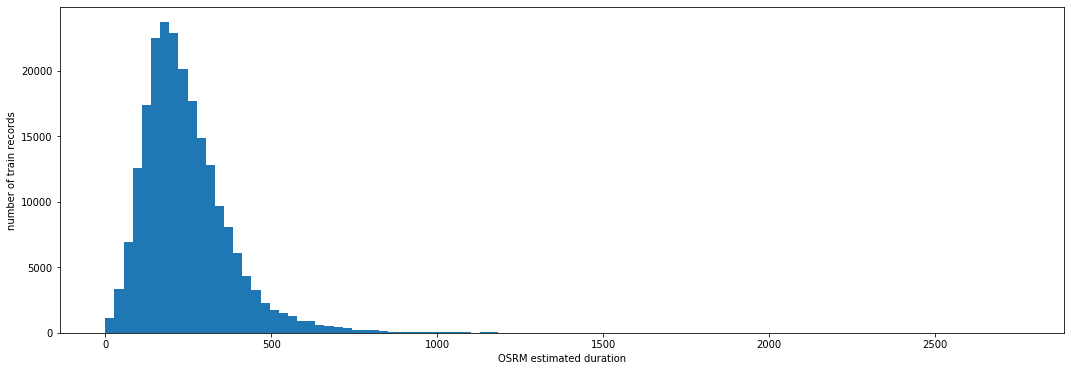

In [96]:
# estimated duration  and number of intervention
#this plot gives the number of intervention at every duration
plt.subplots(figsize=(18,6))
plt.hist(data['OSRM estimated duration'].values, bins=100)
plt.xlabel('OSRM estimated duration')
plt.ylabel('number of train records')
plt.show()

In [ ]:
# make the new test and train file 

In [97]:
data.to_csv('testfx.csv')
data.to_csv('trainfx.csv')
data.to_csv('trainfy.csv')

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', 30)
import math

In [12]:
data = pd.read_csv("trainfx.csv")

In [13]:
data.head()

,Unnamed: 0,Unnamed: 0.1,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,OSRM estimated distance,OSRM estimated duration,month
0,0,0,3,2162,0,0,148.0,2.284796,48.879669,69,2447,19,0,1,2.288053,48.884698,952.5,105.8,7
1,1,1,3,2124,0,1,136.0,2.247464,48.818191,27,2464,9,0,1,2.268519,48.823958,2238.5,243.2,1
2,2,2,3,2163,0,2,139.0,2.258328,48.836759,69,2438,10,1,0,2.272944,48.850498,3026.4,295.4,11
3,3,3,3,2162,0,0,136.0,2.393832,48.776526,69,2510,0,0,1,2.388940,48.787732,1934.2,166.6,1
4,4,4,3,2162,0,3,104.0,2.458610,48.875751,69,2478,0,0,1,2.439331,48.863814,2706.7,262.6,11


In [14]:
data=data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
data.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,OSRM estimated distance,OSRM estimated duration,month
0,3,2162,0,0,148.0,2.284796,48.879669,69,2447,19,0,1,2.288053,48.884698,952.5,105.8,7
1,3,2124,0,1,136.0,2.247464,48.818191,27,2464,9,0,1,2.268519,48.823958,2238.5,243.2,1
2,3,2163,0,2,139.0,2.258328,48.836759,69,2438,10,1,0,2.272944,48.850498,3026.4,295.4,11
3,3,2162,0,0,136.0,2.393832,48.776526,69,2510,0,0,1,2.388940,48.787732,1934.2,166.6,1
4,3,2162,0,3,104.0,2.458610,48.875751,69,2478,0,0,1,2.439331,48.863814,2706.7,262.6,11


In [15]:
data1= pd.read_csv("testfx.csv")
data1.head()

,Unnamed: 0,Unnamed: 0.1,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,OSRM estimated distance,OSRM estimated duration,month
0,0,0,3,2162,0,0,148.0,2.284796,48.879669,69,2447,19,0,1,2.288053,48.884698,952.5,105.8,7
1,1,1,3,2124,0,1,136.0,2.247464,48.818191,27,2464,9,0,1,2.268519,48.823958,2238.5,243.2,1
2,2,2,3,2163,0,2,139.0,2.258328,48.836759,69,2438,10,1,0,2.272944,48.850498,3026.4,295.4,11
3,3,3,3,2162,0,0,136.0,2.393832,48.776526,69,2510,0,0,1,2.388940,48.787732,1934.2,166.6,1
4,4,4,3,2162,0,3,104.0,2.458610,48.875751,69,2478,0,0,1,2.439331,48.863814,2706.7,262.6,11


In [16]:
data1=data1.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
data1.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,OSRM estimated distance,OSRM estimated duration,month
0,3,2162,0,0,148.0,2.284796,48.879669,69,2447,19,0,1,2.288053,48.884698,952.5,105.8,7
1,3,2124,0,1,136.0,2.247464,48.818191,27,2464,9,0,1,2.268519,48.823958,2238.5,243.2,1
2,3,2163,0,2,139.0,2.258328,48.836759,69,2438,10,1,0,2.272944,48.850498,3026.4,295.4,11
3,3,2162,0,0,136.0,2.393832,48.776526,69,2510,0,0,1,2.388940,48.787732,1934.2,166.6,1
4,3,2162,0,3,104.0,2.458610,48.875751,69,2478,0,0,1,2.439331,48.863814,2706.7,262.6,11


In [17]:
#calculate the average speed of each tuples
data['speed']=data['OSRM estimated distance']/data['OSRM estimated duration']
data.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,OSRM estimated distance,OSRM estimated duration,month,speed
0,3,2162,0,0,148.0,2.284796,48.879669,69,2447,19,0,1,2.288053,48.884698,952.5,105.8,7,9.002836
1,3,2124,0,1,136.0,2.247464,48.818191,27,2464,9,0,1,2.268519,48.823958,2238.5,243.2,1,9.204359
2,3,2163,0,2,139.0,2.258328,48.836759,69,2438,10,1,0,2.272944,48.850498,3026.4,295.4,11,10.245091
3,3,2162,0,0,136.0,2.393832,48.776526,69,2510,0,0,1,2.388940,48.787732,1934.2,166.6,1,11.609844
4,3,2162,0,3,104.0,2.458610,48.875751,69,2478,0,0,1,2.439331,48.863814,2706.7,262.6,11,10.307312


In [18]:
#group with the emergency vehicle type to calculate average speed of each type of vehicle
datax=data.groupby('emergency vehicle type', as_index=False)['speed'].mean()

In [19]:
datax.head()

,emergency vehicle type,speed
0,0,9.951412
1,1,9.634853
2,2,11.317247
3,3,9.615902
4,4,10.263345


In [20]:
# fill speed with average speed of each type of vehicle
data["new speed"] = data["emergency vehicle type"].map(datax["speed"])

In [21]:
data=data.drop(['speed'], axis=1)
data.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,OSRM estimated distance,OSRM estimated duration,month,new speed
0,3,2162,0,0,148.0,2.284796,48.879669,69,2447,19,0,1,2.288053,48.884698,952.5,105.8,7,8.764865
1,3,2124,0,1,136.0,2.247464,48.818191,27,2464,9,0,1,2.268519,48.823958,2238.5,243.2,1,8.736782
2,3,2163,0,2,139.0,2.258328,48.836759,69,2438,10,1,0,2.272944,48.850498,3026.4,295.4,11,8.764865
3,3,2162,0,0,136.0,2.393832,48.776526,69,2510,0,0,1,2.388940,48.787732,1934.2,166.6,1,8.764865
4,3,2162,0,3,104.0,2.458610,48.875751,69,2478,0,0,1,2.439331,48.863814,2706.7,262.6,11,8.764865


In [22]:
data['new speed'].nunique()

75

In [ ]:
# repeat for test data

In [23]:
data1['speed']=data1['OSRM estimated distance']/data1['OSRM estimated duration']

In [24]:
datay=data1.groupby('emergency vehicle type', as_index=False)['speed'].mean()

In [25]:
data1["new speed"] = data1["emergency vehicle type"].map(datay["speed"])

In [26]:
data1=data1.drop(['speed'], axis=1)
data1.head()

,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle type,rescue center,time key sélection,status preceding selection,departed from its rescue center,longitude before departure,latitude before departure,OSRM estimated distance,OSRM estimated duration,month,new speed
0,3,2162,0,0,148.0,2.284796,48.879669,69,2447,19,0,1,2.288053,48.884698,952.5,105.8,7,8.764865
1,3,2124,0,1,136.0,2.247464,48.818191,27,2464,9,0,1,2.268519,48.823958,2238.5,243.2,1,8.736782
2,3,2163,0,2,139.0,2.258328,48.836759,69,2438,10,1,0,2.272944,48.850498,3026.4,295.4,11,8.764865
3,3,2162,0,0,136.0,2.393832,48.776526,69,2510,0,0,1,2.388940,48.787732,1934.2,166.6,1,8.764865
4,3,2162,0,3,104.0,2.458610,48.875751,69,2478,0,0,1,2.439331,48.863814,2706.7,262.6,11,8.764865


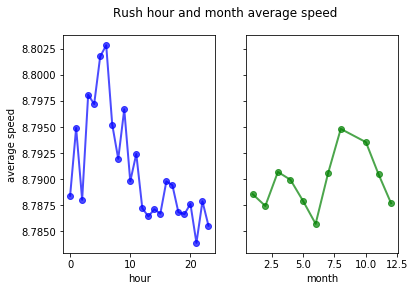

In [30]:
#this plot gives the infrence about that avergae speed  in particular hour and month,average speed is less means more traffic
avg_speed_h=data['new speed']
fig, ax = plt.subplots(ncols=2, sharey=True)
ax[0].plot(data.groupby('time key sélection').mean()['new speed'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(data.groupby('month').mean()['new speed'], 'go-', lw=2, alpha=0.7)
#ax[2].plot(train.groupby('pickup_week_hour').mean()['avg_speed_h'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('hour')
ax[1].set_xlabel('month')
#ax[2].set_xlabel('weekhour')
ax[0].set_ylabel('average speed')
fig.suptitle('Rush hour and month average speed')
plt.show()